# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# για να εμφανίζονται τα plots μέσα στο notebook
%matplotlib inline

## Import data

In [2]:
# Movies
movies_df = pd.read_csv('data/movies.csv', sep='\t') # οι στήλες είναι χωρισμένες με tabs
movies_df

,Unnamed: 0,movie_id,title,genres
0,0,1,Toy Story (1995),Animation|Children's|Comedy
1,1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,2,3,Grumpier Old Men (1995),Comedy|Romance
3,3,4,Waiting to Exhale (1995),Comedy|Drama
4,4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
3878,3878,3948,Meet the Parents (2000),Comedy
3879,3879,3949,Requiem for a Dream (2000),Drama
3880,3880,3950,Tigerland (2000),Drama
3881,3881,3951,Two Family House (2000),Drama


## Import data (σωστά)

In [3]:
# Movies
movies_df = pd.read_csv('data/movies.csv', sep='\t')
movies_df = movies_df.drop(movies_df.columns[0], axis=1)

# Users
users_df = pd.read_csv('data/users.csv', sep='\t')
users_df = users_df.drop(users_df.columns[0], axis=1)

# Ratings
ratings_df = pd.read_csv('data/ratings.csv', sep=';')
ratings_df = ratings_df.drop(ratings_df.columns[0], axis=1)

In [4]:
movies_df.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
users_df.head()

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,02460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer


In [6]:
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### Dataframe sizes

In [7]:
movies_df.size

11649

In [8]:
users_df.size

42280

In [9]:
ratings_df.size

4000836

### Βλέπουμε αν υπάρχουν NaN ή null τιμές

In [10]:
movies_df.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [11]:
users_df.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
age_desc      0
occ_desc      0
dtype: int64

In [12]:
ratings_df.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

### Βλέπουμε τις δυνατές τιμές των age_desc και occ_desc του users dataframe

In [13]:
users_df.age_desc.unique()

array(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'],
      dtype=object)

In [14]:
users_df.occ_desc.unique()

array(['K-12 student', 'self-employed', 'scientist',
       'executive/managerial', 'writer', 'homemaker', 'academic/educator',
       'programmer', 'technician/engineer', 'other or not specified',
       'clerical/admin', 'sales/marketing', 'college/grad student',
       'lawyer', 'farmer', 'unemployed', 'artist', 'tradesman/craftsman',
       'customer service', 'retired', 'doctor/health care'], dtype=object)

### Πόσες βαθμολογίες έχει κάνει κάθε χρήστης

In [15]:
ratings_df.groupby(by='user_id').rating.count()

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: rating, Length: 6040, dtype: int64

### Πόσα είδη ταινιών υπάρχουν

In [16]:
movies_df.genres.unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

#### Xωρίζουμε τα genres με την split

In [17]:
movies_df.genres.str.split('|')

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

#### Χρησιμοποιούμε την explode() για να δημιουργήσουμε rows από κάθε στοιχείο των arrays
-> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html

In [18]:
movies_df.genres.str.split('|').explode()

0        Animation
0       Children's
0           Comedy
1        Adventure
1       Children's
           ...    
3879         Drama
3880         Drama
3881         Drama
3882         Drama
3882      Thriller
Name: genres, Length: 6408, dtype: object

In [19]:
# Μπορούμε τώρα να βρούμε τα unqiue
movies_df.genres.str.split('|').explode().unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

## Δοκιμάζουμε να φτιάξουμε διάφορα plots για να οπτικοποιήσουμε τα δεδομένα τα οποία έχουμε

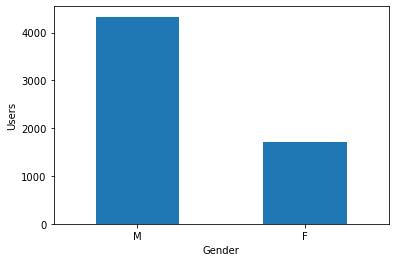

In [20]:
# Ο αριθμός των male/female χρηστών
users_df.gender.value_counts().plot(kind='bar',
                                    rot=0,
                                    xlabel='Gender',
                                    ylabel='Users');

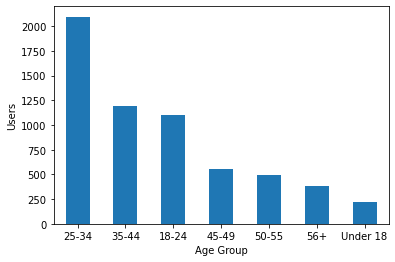

In [22]:
# αριθμός χρηστών σε κάθε age group
users_df.age_desc.value_counts().plot(kind='bar',
                                      rot=0,
                                      xlabel='Age Group',
                                      ylabel='Users');

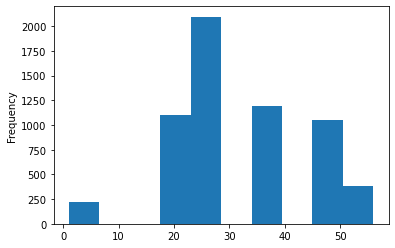

In [23]:
# Ηλικιακή κατανομή
users_df.age.plot(kind='hist');

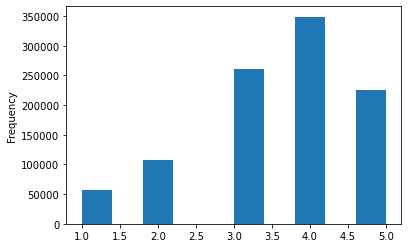

In [24]:
# Κατανομή βαθμολογιών
ratings_df.rating.plot(kind='hist');

### Οπτικοποίηση διαφορετικών genres χρησιμοποιώντας τις μεθόδους που αναφέρονται πιο πάνω

* split()
* explode()
* assign() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

In [25]:
split_genres_movies_df = movies_df.assign(Genre=movies_df.genres.str.split(r'|')).explode('Genre').drop('genres', axis=1)
split_genres_movies_df

,movie_id,title,Genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama


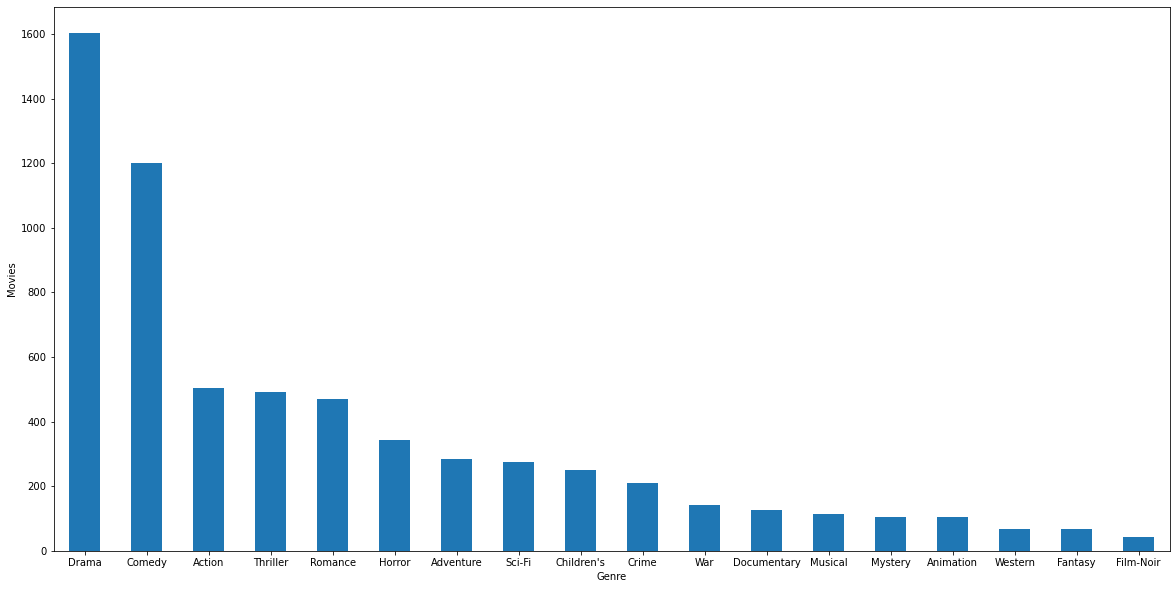

In [26]:
split_genres_movies_df.Genre.value_counts().plot(figsize=(20,10),
                                                 kind='bar',
                                                 rot=0,
                                                 xlabel='Genre',
                                                 ylabel='Movies');

## Πως βαθμολογούν οι χρήστες αναλόγως τα χαρακτηριστικά τους

In [27]:
users_ratings_merged = ratings_df.merge(users_df, on='user_id', how='left')
users_ratings_merged

,user_id,movie_id,rating,timestamp,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,1193,5,978300760,F,1,10,48067,Under 18,K-12 student
1,1,661,3,978302109,F,1,10,48067,Under 18,K-12 student
2,1,914,3,978301968,F,1,10,48067,Under 18,K-12 student
3,1,3408,4,978300275,F,1,10,48067,Under 18,K-12 student
4,1,2355,5,978824291,F,1,10,48067,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,25-34,doctor/health care
1000205,6040,1094,5,956704887,M,25,6,11106,25-34,doctor/health care
1000206,6040,562,5,956704746,M,25,6,11106,25-34,doctor/health care
1000207,6040,1096,4,956715648,M,25,6,11106,25-34,doctor/health care


### Average Ratings αναλόγως το φύλο

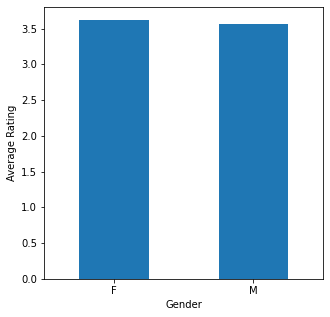

In [28]:
users_ratings_merged.groupby('gender').rating.mean().plot(figsize=(5, 5),
                                                   kind='bar',
                                                   rot=0,
                                                   xlabel='Gender',
                                                   ylabel='Average Rating');

### Average Ratings αναλόγως την ηλικιακή κατηγορία

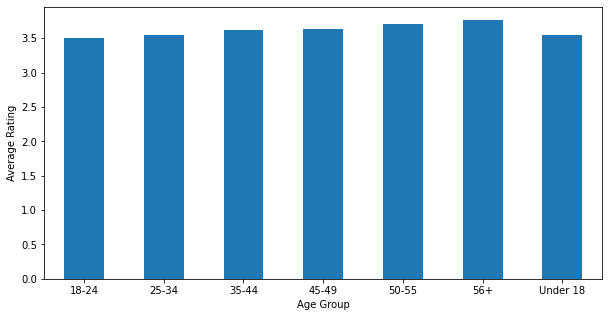

In [29]:
users_ratings_merged.groupby('age_desc').rating.mean().plot(figsize=(10, 5),
                                                            kind='bar',
                                                            rot=0,
                                                            xlabel='Age Group',
                                                            ylabel='Average Rating');

### Average Ratings αναλόγως το επάγγελμα

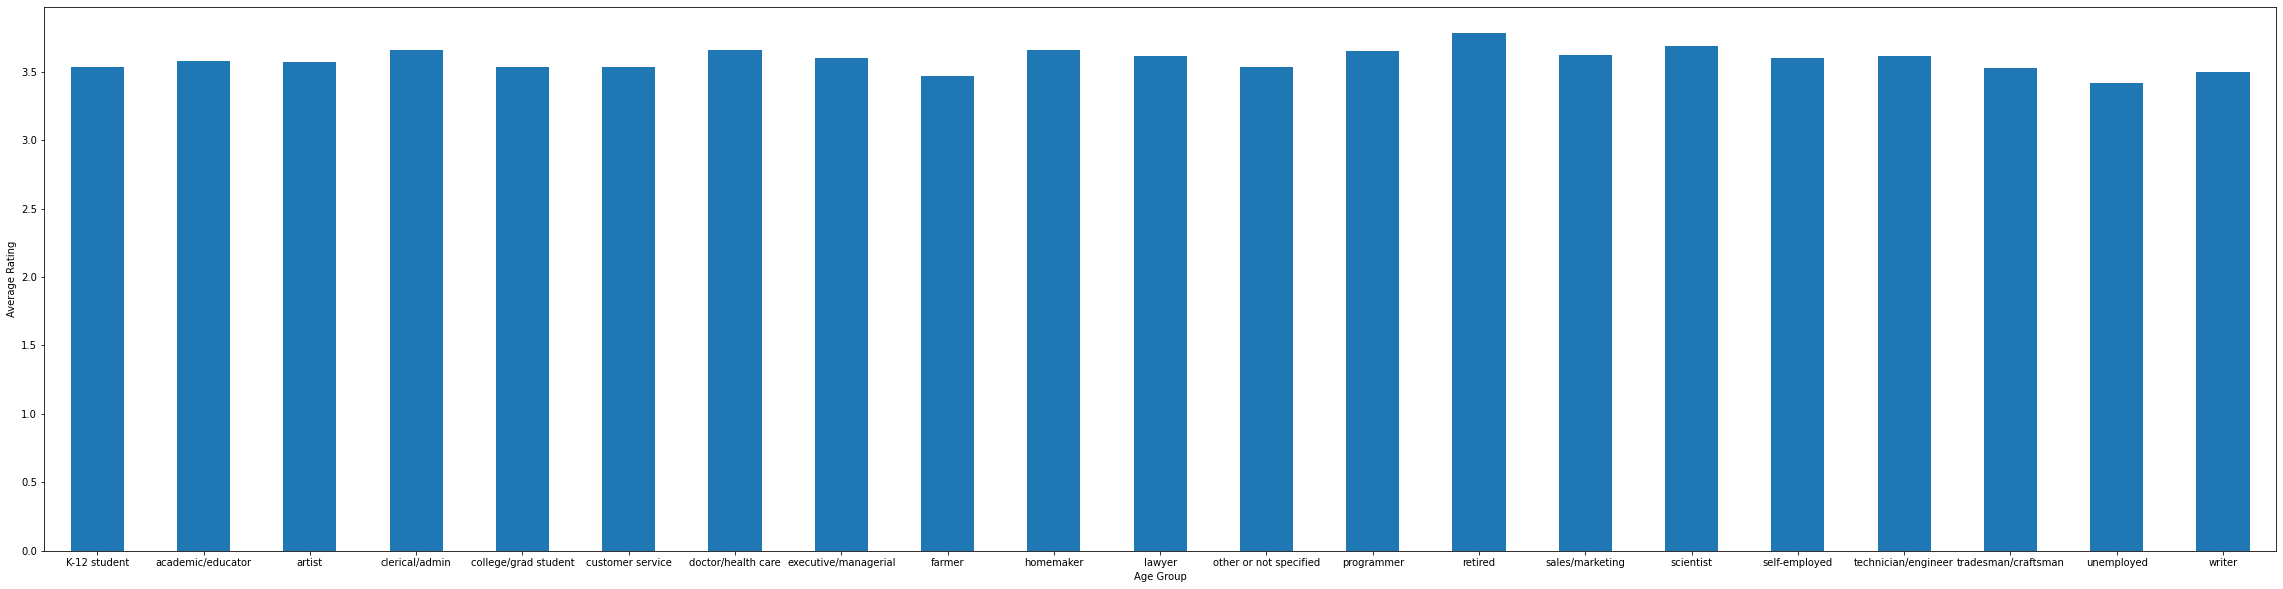

In [30]:
users_ratings_merged.groupby('occ_desc').rating.mean().plot(figsize=(40, 10),
                                                            kind='bar',
                                                            rot=0,
                                                            xlabel='Age Group',
                                                            ylabel='Average Rating');

### Rating Frequencies αναλόγως το φύλο

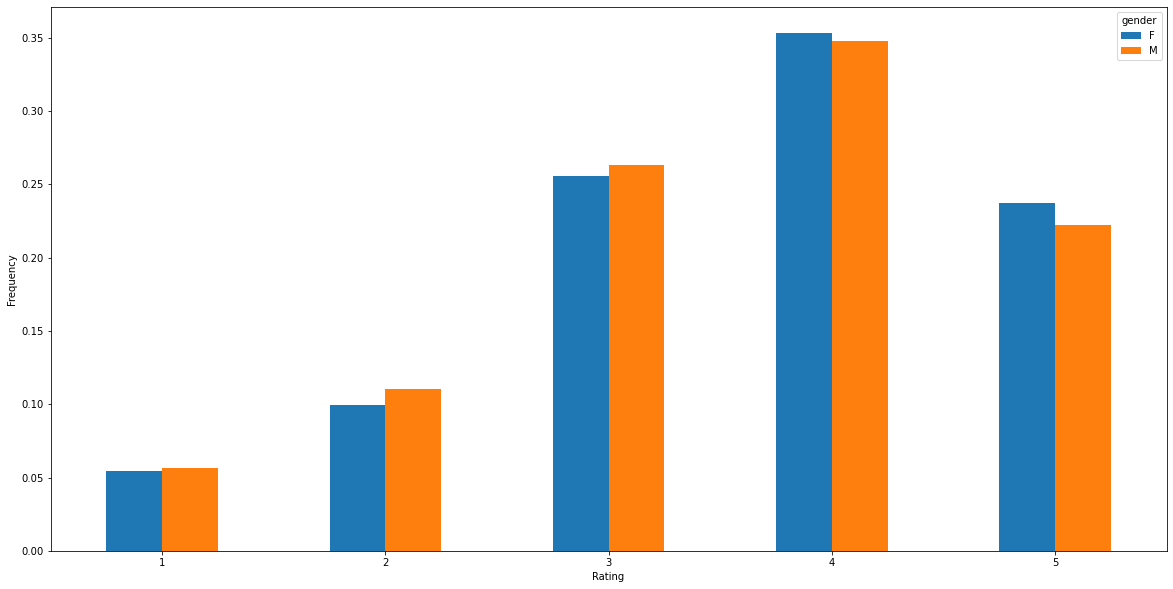

In [31]:
users_ratings_merged.groupby('gender').rating.value_counts(normalize=True).unstack(0).plot(figsize=(20,10),
                                                                                           kind='bar',
                                                                                           rot=0,
                                                                                           xlabel='Rating',
                                                                                           ylabel='Frequency');

### Rating Frequencies αναλόγως την ηλικιακή κατηγορία

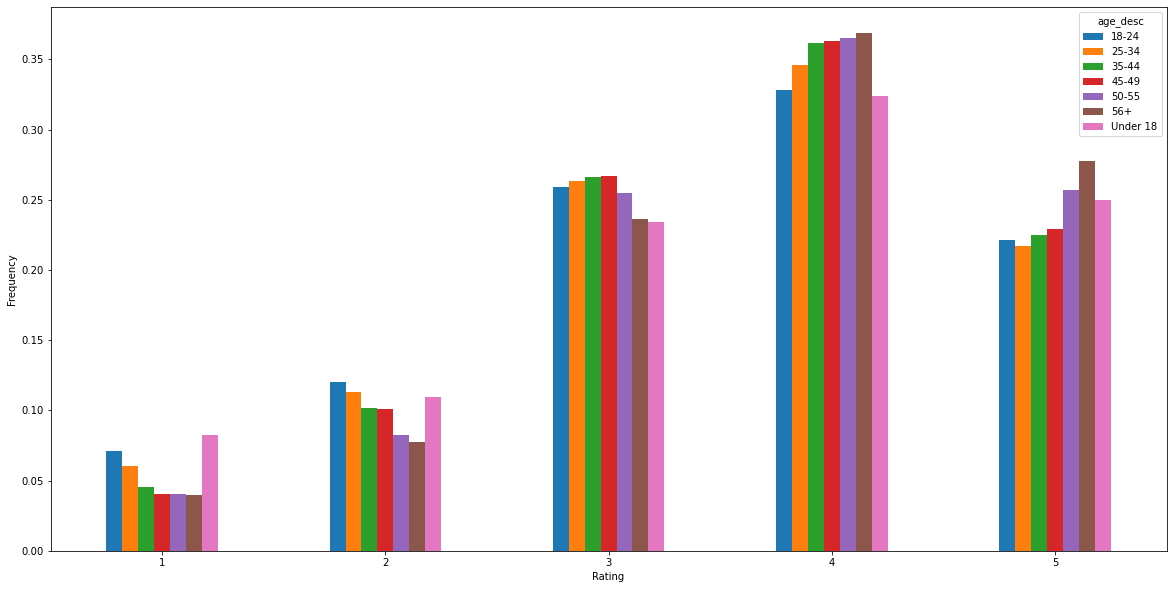

In [32]:
users_ratings_merged.groupby('age_desc').rating.value_counts(normalize=True).unstack(0).plot(figsize=(20,10),
                                                                                             kind='bar',
                                                                                             rot=0,
                                                                                             xlabel='Rating',
                                                                                             ylabel='Frequency');

### Rating Frequencies αναλόγως το επάγγελμα

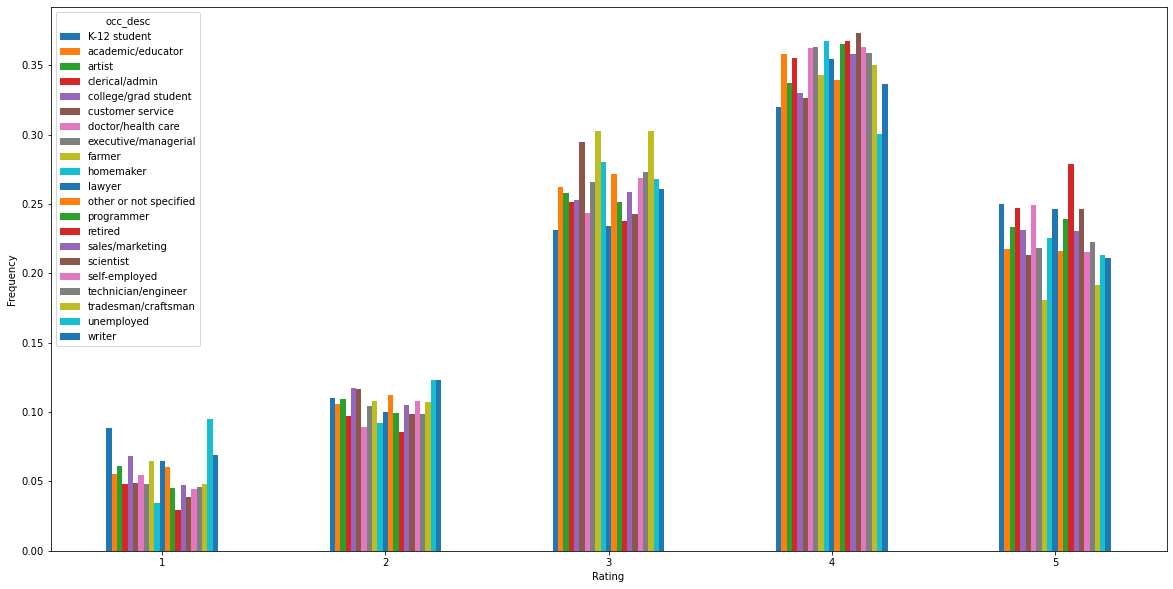

In [33]:
users_ratings_merged.groupby('occ_desc').rating.value_counts(normalize=True).unstack(0).plot(figsize=(20,10),
                                                                                             kind='bar',
                                                                                             rot=0,
                                                                                             xlabel='Rating',
                                                                                             ylabel='Frequency');

## Δημιουργούμε ένα merged dataframe που περιέχει όλες τις πληροφορίες

In [34]:
merged_df = split_genres_movies_df.merge(ratings_df, on='movie_id', how='right')
merged_df = merged_df.merge(users_df, on='user_id', how='left')
merged_df

,movie_id,title,Genre,user_id,rating,timestamp,gender,age,occupation,zipcode,age_desc,occ_desc
0,1193,One Flew Over the Cuckoo's Nest (1975),Drama,1,5,978300760,F,1,10,48067,Under 18,K-12 student
1,661,James and the Giant Peach (1996),Animation,1,3,978302109,F,1,10,48067,Under 18,K-12 student
2,661,James and the Giant Peach (1996),Children's,1,3,978302109,F,1,10,48067,Under 18,K-12 student
3,661,James and the Giant Peach (1996),Musical,1,3,978302109,F,1,10,48067,Under 18,K-12 student
4,914,My Fair Lady (1964),Musical,1,3,978301968,F,1,10,48067,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...,...,...,...
2101810,1096,Sophie's Choice (1982),Drama,6040,4,956715648,M,25,6,11106,25-34,doctor/health care
2101811,1097,E.T. the Extra-Terrestrial (1982),Children's,6040,4,956715569,M,25,6,11106,25-34,doctor/health care
2101812,1097,E.T. the Extra-Terrestrial (1982),Drama,6040,4,956715569,M,25,6,11106,25-34,doctor/health care
2101813,1097,E.T. the Extra-Terrestrial (1982),Fantasy,6040,4,956715569,M,25,6,11106,25-34,doctor/health care


### Average rating αναλόγως το είδος ταινίας

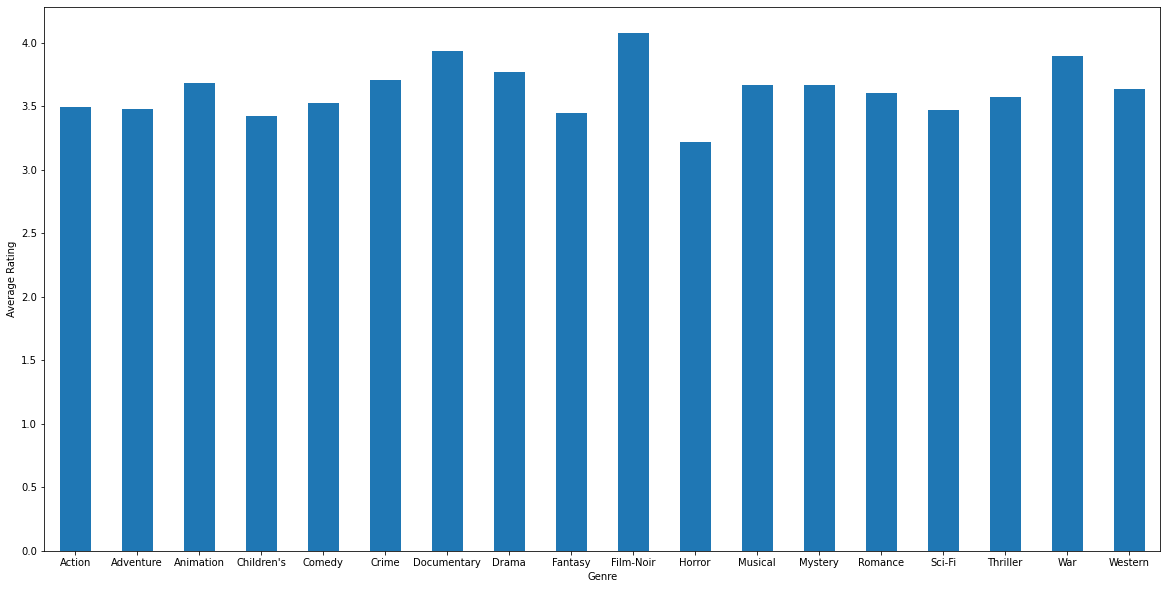

In [35]:
merged_df.groupby('Genre').rating.mean().plot(figsize=(20,10),
                                              kind='bar',
                                              rot=0,
                                              xlabel='Genre',
                                              ylabel='Average Rating');

### Είδη ταινιών που παρακολουθούν οι χρήστες αναλόγως το φύλο

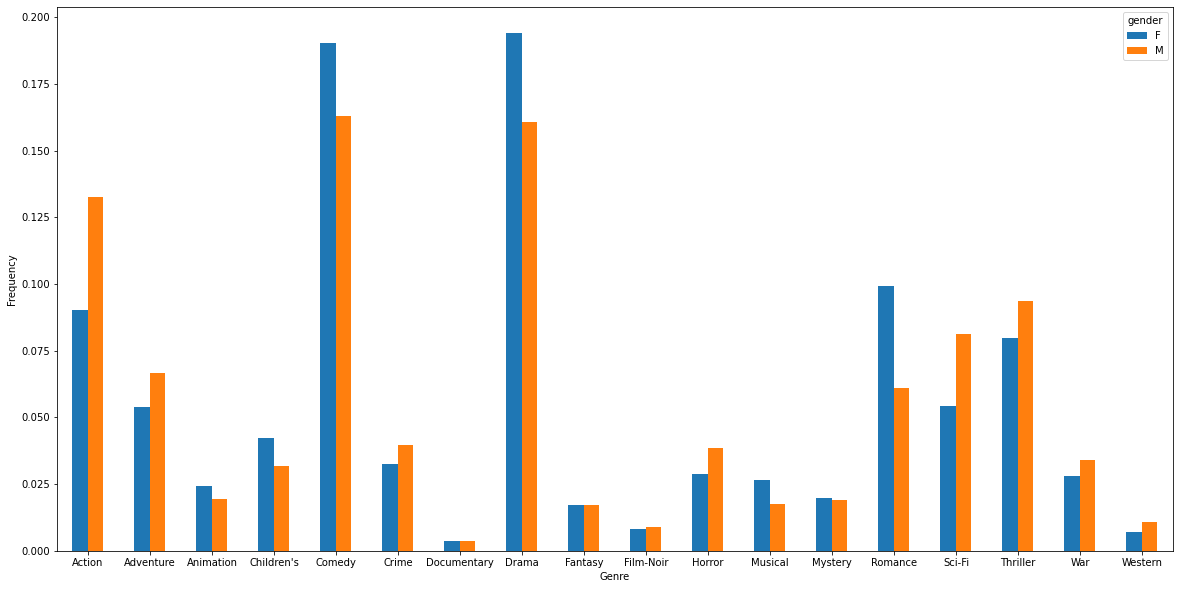

In [36]:
merged_df.groupby('gender').Genre.value_counts(normalize=True).unstack(0).plot(figsize=(20,10),
                                                 kind='bar',
                                                 rot=0,
                                                 xlabel='Genre',
                                                 ylabel='Frequency');

### Είδη ταινιών που παρακολουθούν οι χρήστες αναλόγως την ηλικιακή ομάδα

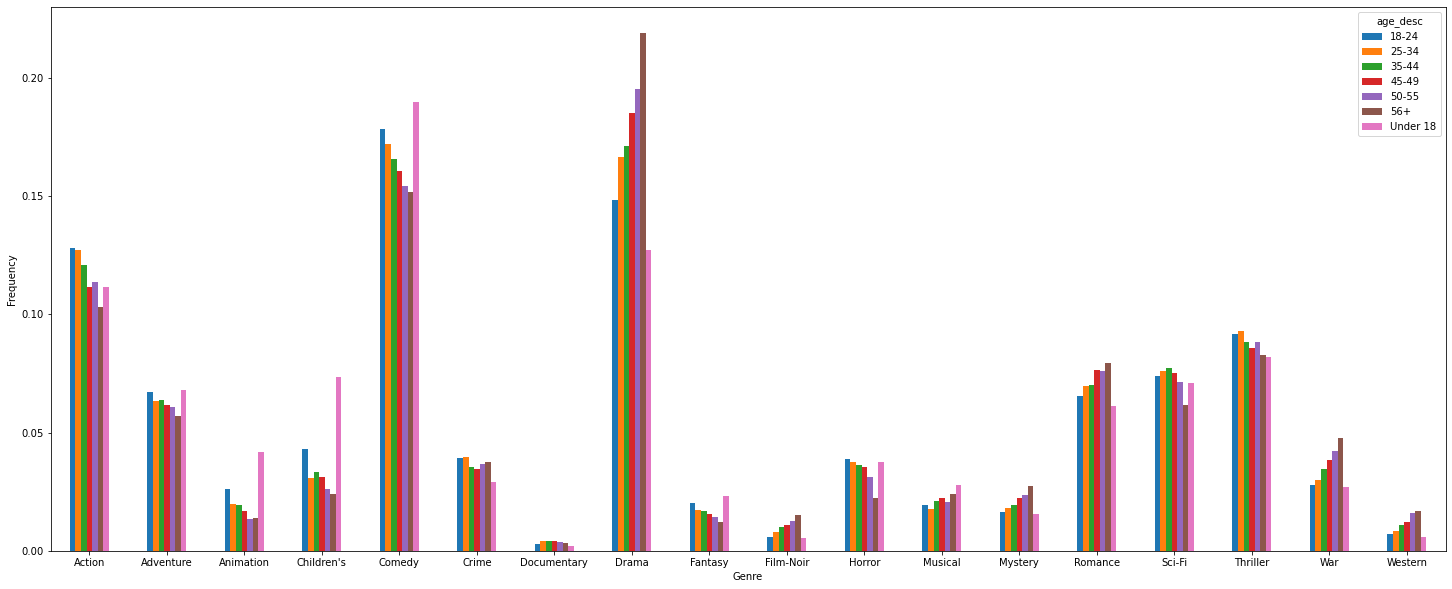

In [37]:
merged_df.groupby('age_desc').Genre.value_counts(normalize=True).unstack(0).plot(figsize=(25,10),
                                                 kind='bar',
                                                 rot=0,
                                                 xlabel='Genre',
                                                 ylabel='Frequency');